In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q "drive/My Drive/Small_set_cats_vs_dogs.zip"

unzip:  cannot find or open drive/My Drive/Small_set_cats_vs_dogs.zip, drive/My Drive/Small_set_cats_vs_dogs.zip.zip or drive/My Drive/Small_set_cats_vs_dogs.zip.ZIP.


In [2]:
import tensorflow.keras
import tensorflow

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras import backend as K 
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [4]:
print (tensorflow.__version__)

2.8.0


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [32]:
epochs = 10
batch_size = 16
training_samples = 822
validation_samples = 107
img_width = 128
img_height = 160 
channels = 3
input_shape = (img_width,img_height,3)

In [33]:
train_data_dir = '/content/drive/My Drive/CS_426_Team_17/Thermal Converted Images/Greek'
validation_data_dir = '/content/drive/My Drive/CS_426_Team_17/Thermal Converted Images/Chile'


train_datagen = ImageDataGenerator( 
    rescale=1. / 255, 
    shear_range=0.4, 
    zoom_range=0.4, 
    rotation_range=20,
		width_shift_range=0.4,
		height_shift_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest") 


val_datagen = ImageDataGenerator(rescale=1. / 255) 
  
train_generator = train_datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary') 
  
validation_generator = val_datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary') 
  

Found 14250 images belonging to 2 classes.
Found 11500 images belonging to 2 classes.


<class 'numpy.ndarray'>
(128, 160, 3)
(128, 160) (128, 160) (128, 160)


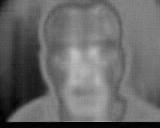

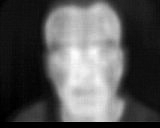

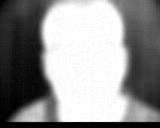

False
False


In [34]:
# Checking the images sizes
from PIL import Image
from numpy import asarray


# load the image and convert into
# numpy array
img = Image.open('/content/drive/My Drive/CS_426_Team_17/Thermal Converted Images/Greek/Drunk/01_petros_2_f_M_20_71_033_frame_07.jpg')

# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata = asarray(img)

# <class 'numpy.ndarray'>
print(type(numpydata))

# shape
print(numpydata.shape)
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
img = cv2.imread("/content/drive/My Drive/CS_426_Team_17/Thermal Converted Images/Greek/Drunk/01_petros_2_f_M_20_71_033_frame_07.jpg")
b,g,r = cv2.split(img)
print(b.shape, g.shape, r.shape)
cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)
print((b == g).all())
print((r == g).all())

In [35]:
image_batch_1= next(train_generator)
print(len(image_batch_1[0]))

16


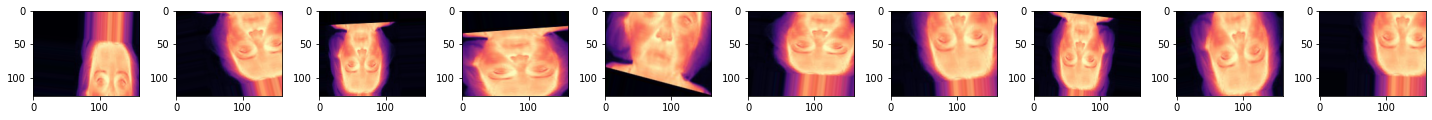

(128, 160, 3)

In [36]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_images = [train_generator[0][0][0] for i in range(10)]
plotImages(augmented_images)
augmented_images[0].shape

In [37]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape,padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(32,(2, 2), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (2, 2), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (2, 2), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(128, (2, 2), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(128, (2, 2), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [38]:
def CNN(input_shape=(128,160,3)): 
    X_input = Input(input_shape)# Height x Width x Channel
    X = Conv2D(32, (2,2), padding='same', name ='conv_1')(X_input)
    X = Activation('relu', name ='relu_1')(X)
    X = MaxPooling2D(pool_size=(2,2),name='max_pool_1')(X)

    X = Conv2D(32, (2,2), padding='same', name ='conv_2')(X)
    X = Activation('relu', name ='relu_2')(X)
    X = MaxPooling2D(pool_size=(2,2),name='max_pool_2')(X)

    X = Conv2D(64, (2,2), padding='same', name ='conv_3')(X)
    X = Activation('relu', name ='relu_3')(X)
    X = MaxPooling2D(pool_size=(2,2),name='max_pool_3')(X)

    X = Conv2D(64, (2,2), padding='same', name ='conv_4')(X)
    X = Activation('relu', name ='relu_4')(X)
    X = MaxPooling2D(pool_size=(2,2),name='max_pool_4')(X)

    X = Conv2D(128, (2,2), padding='same', name ='conv_5')(X)
    X = Activation('relu', name ='relu_5')(X)
    X = MaxPooling2D(pool_size=(2,2),name='max_pool_5')(X)

    X = Conv2D(128, (2,2), padding='same', name ='conv_6')(X)
    X = Activation('relu', name ='relu_6')(X)
    X = MaxPooling2D(pool_size=(2,2),name='max_pool6')(X)

    X = Flatten(name='flatten')(X)
    X = Dense(64, name='Dense_1')(X)
    X = Activation('relu',name='relu_7')(X)
    X = Dropout(0.1,name='droput')(X)
    X = Dense(1,name='Dense_2')(X)
    X = Activation('sigmoid',name='sigmoid')(X)

    model = Model(inputs=X_input, outputs=X, name='CNN')
    return model

model = CNN(input_shape)
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 160, 3)]     0         
                                                                 
 conv_1 (Conv2D)             (None, 128, 160, 32)      416       
                                                                 
 relu_1 (Activation)         (None, 128, 160, 32)      0         
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 64, 80, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 64, 80, 32)        4128      
                                                                 
 relu_2 (Activation)         (None, 64, 80, 32)        0         
                                                                 
 max_pool_2 (MaxPooling2D)   (None, 32, 40, 32)        0       

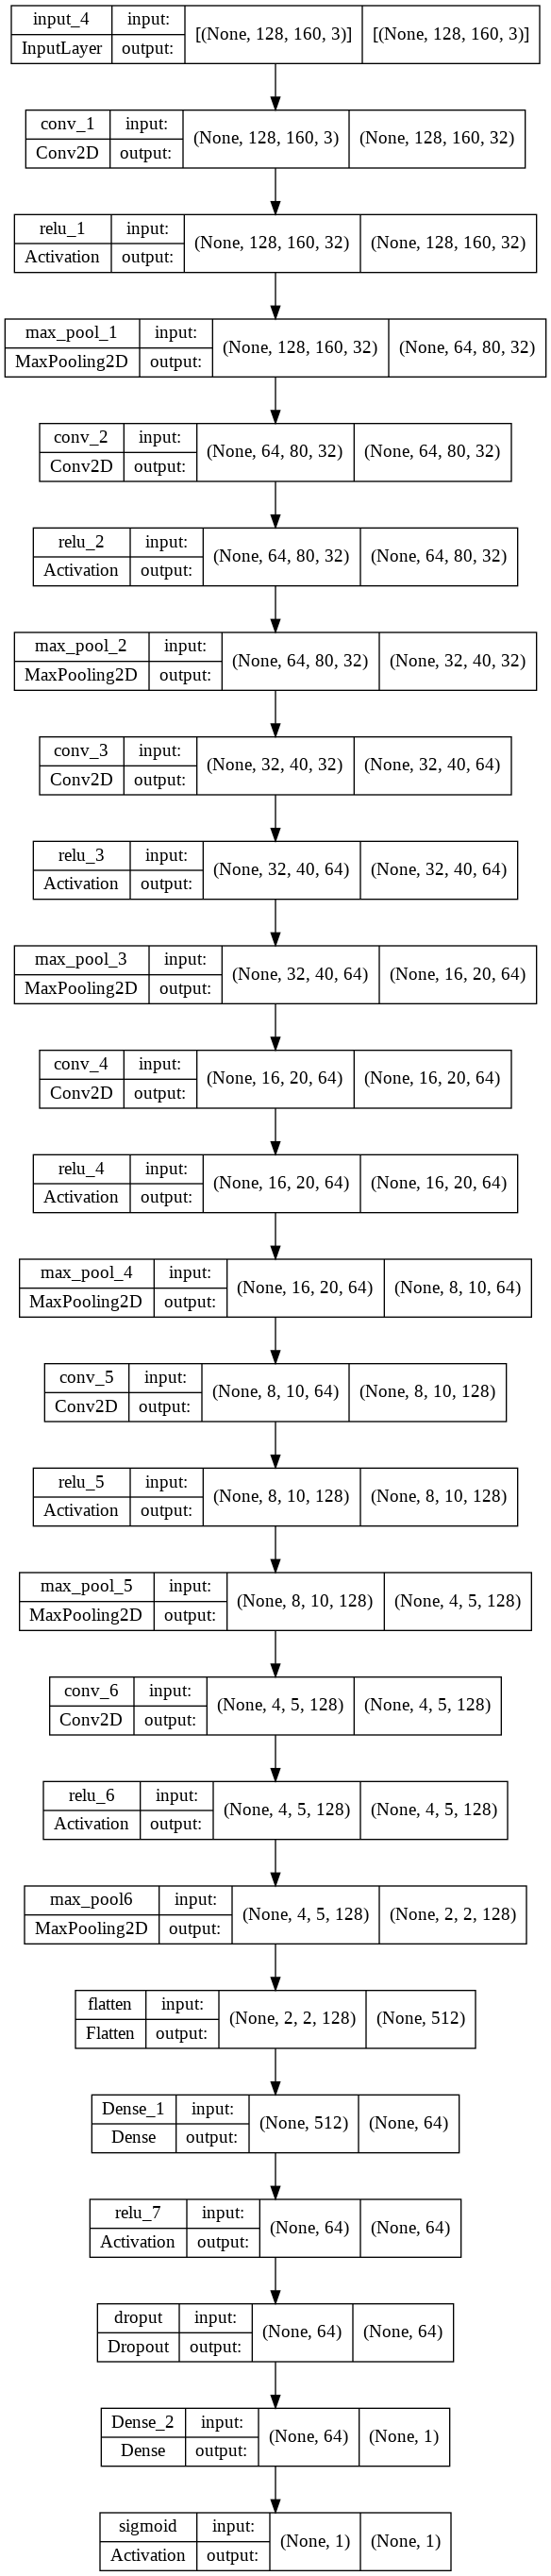

In [40]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [41]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

snapshot_name = 'dummy_model_'
checkpoint = ModelCheckpoint(filepath=snapshot_name+".{epoch:02d}-{val_accuracy:.2f}.hdf5", monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')

In [42]:
history = model.fit_generator(train_generator, 
    steps_per_epoch = training_samples // batch_size, 
    epochs = epochs, validation_data = validation_generator, 
    validation_steps = validation_samples // batch_size,
    callbacks=[reduce_lr,checkpoint]) 

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


51/51 [==============================] - 256s 5s/step - loss: 0.6891 - accuracy: 0.5809 - val_loss: 0.5298 - val_accuracy: 0.7708 - lr: 0.0010
Epoch 2/10
51/51 [==============================] - 94s 2s/step - loss: 0.5730 - accuracy: 0.7370 - val_loss: 0.4104 - val_accuracy: 0.8854 - lr: 0.0010
Epoch 3/10
51/51 [==============================] - 97s 2s/step - loss: 0.3953 - accuracy: 0.8309 - val_loss: 0.7894 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 4/10
51/51 [==============================] - 94s 2s/step - loss: 0.3534 - accuracy: 0.8725 - val_loss: 0.9418 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 5/10
51/51 [==============================] - 90s 2s/step - loss: 0.3578 - accuracy: 0.8640 - val_loss: 1.4648 - val_accuracy: 0.8021 - lr: 0.0010
Epoch 6/10
51/51 [==============================] - 84s 2s/step - loss: 0.3089 - accuracy: 0.8860 - val_loss: 1.0608 - val_accuracy: 0.8021 - lr: 0.0010
Epoch 7/10
51/51 [==============================] - 82s 2s/step - loss: 0.2883 - accuracy: 0